# 1

What is a classification Decision Tree?

A classification decision tree is a type of supervised machine learning model that is used to predict the category of a target variable based on several input variables. Each interval node is a 'test' on an attribute of the data. each branch represents the outcome and each leaf node represents a final class prediction. 

What problem does a Classification Decision Tree address?

Classification decision trees are used for problems where the data can be split into categories based on feature inputs. In other words, classifying data into predefined categories. They are effective for:
- Categorizing input data into predefined classes.
- Handling both numerical and categorical data
- Providing clear and comprehensible decision-making processess, as the structure of the decision tree can be visualized and is easy to understand.
- Capturing nonlinear relationships.
- Handling missing or imprecise data.


Provide Some examples of real-world applications where it would be useful.

- Decision trees can help in diagnosing diseases by analyzing patients' symptoms and medical histories to predict diseases.

- Customer Segmentation: Businesses use decision trees to classify customer based on features like demographics, past purchases, and browsing behaviors to tailor marketing strategies.

- Fraud Detection: In banking and finance, decision trees are used to predict fraudulent transsactions by looking at patterns of behavior that typically indicate fraud.



Understand the difference between how a classification Decision Tree makes Predictions versus how Multi Linear Regression makes predictions 

Prediction
- Classification decision tree output categorical class labels. They are used when the response variable is categorical. (yes/no, likely_to_buy/not_likely_to_buy, has_cancer/doesn't). Multilinear regression predicts a continuous outcome and is used when the response is numeric (prices, age)

Decision Process:
- Whereas multilinear regression makes a line of best fit or a hyper lane that models the relationshup between features and the outcome by using coefficients that minimize prediction errors. Decision trees split the data across branches, where feature values lead to categorical outputs.

Model Structure:
- Decision tree partition the data into subsets based on feature values, which can handle non-linear relationships between features and the target variable.

Notes: 
- Each stage of the Decision Tree are interactions in the same manner as multilinear regression. Tree might first test age, then test income to determine a class. Capturing a relationshup between these variables.

- Classification predicts discrete categories. While, Regression predicts continuous values

- More of a predictive model 

 Disadvantages 
- A tree that is too deep can capture random noise in the data.
- Features with many unique values might dominate teh splits.
- Small changes in data can lead to a completely different tree structure.
  

# 2


What real-world application scenario(s) might be most appropriately addressed by Accuracy?
- Accuracy measures the proportion of true results (both true positive and true negative) in the population.
$$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$$

Accuracy is effective when the cost of false positive and false negatives are similar. It also works best if the proportion between all outcomes is the same. Measures the proportion of positive prediction to evaluate its reliability.

Example: Detecting defective items on an assembly lines. Accuracy works because the cost of missing a defect item (false negative) or flagging a non-defective one (false positive) is similar.

What real-world application scenario(s) might be most appropriately addressed by Sensitivity?
- Sensitivity measures the proportion of actual positives that are correctly identified.
$$Sensitivity = \frac{TP}{TP + FN}$$

Sensitivity is also known as true positive rate. It is mostly used in cases where the cost of False negative is much higher than the false positives. How good a test is at identifying actual positives.

Example: Screening for diseases. A false negative says the person does not have cancer when they actually do which is really bad. A false positive may result in additional testing. 

What real-world application scenario(s) might be most appropriately addressed by specificity?
- Specificity measures the proportion of actual negatives that are correctly identified
$$Specificity = \frac{TN}{TN + FP}$$

Specificity, also known as true negative rate, is most appropriate in scenarios where the cost of a false positive is much higher than the cost of a false negative. Focuses on how good the test is at identifying actual negatives.

Example: Classifiying emails as spam or not. Identifiying an email as spam when it is not (false positve) may result in the person missing an important email. Whereas if a spam folder appear in your inbox (false negative), it's not as bad because you can just remove the email. 

What real-world application scenario(s) might be most appropriately addressed by Precision?
- Precision measures the proportion of positive identifications that were actually correct.
$$Precision = \frac{TP}{TP + FP}$$

Precision is most appropriate when the cost false positives (FP) is much higher than the cost of False Negatives (FN). How good the test is at avoiding false positives by identifying the proportion of true positives.

Example: Fraud Detection in banking. A false positive (Not detecting fraud) is very bad. A false positive (detecting fraud when there is not) is not at as bad.

https://en.wikipedia.org/wiki/Sensitivity_and_specificity
A confusion matrix tests all metrics.
Which one is most important determines on the final classification 

# 3

In [7]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
# import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
df = pd.read_csv(url, encoding="ISO-8859-1")
ab = df.copy()
# create `ab_reduced_noNaN` based on the specs above

In [8]:
rows, columns = ab.shape
print(f'# of rows are: {rows}\n# of columns are {columns}')

# of rows are: 325
# of columns are 13


In [9]:
ab.columns

Index(['Title', 'Author', 'List Price', 'Amazon Price', 'Hard_or_Paper',
       'NumPages', 'Publisher', 'Pub year', 'ISBN-10', 'Height', 'Width',
       'Thick', 'Weight_oz'],
      dtype='object')

In [10]:
ab.isna().sum()

Title            0
Author           1
List Price       1
Amazon Price     0
Hard_or_Paper    0
NumPages         2
Publisher        1
Pub year         1
ISBN-10          0
Height           4
Width            5
Thick            1
Weight_oz        9
dtype: int64

In [11]:
ab_reduced_noNaN = ab.copy()
del [ab_reduced_noNaN['Weight_oz'], ab_reduced_noNaN['Height'], ab_reduced_noNaN['Width']]

In [12]:
ab_reduced_noNaN.dropna(inplace=True)
ab_reduced_noNaN.isna().sum()

Title            0
Author           0
List Price       0
Amazon Price     0
Hard_or_Paper    0
NumPages         0
Publisher        0
Pub year         0
ISBN-10          0
Thick            0
dtype: int64

In [13]:
rows, columns = ab_reduced_noNaN.shape
print(f'# of rows are: {rows}\n# of columns are {columns}')

# of rows are: 319
# of columns are 10


In [14]:
ab_reduced_noNaN.dtypes

Title             object
Author            object
List Price       float64
Amazon Price     float64
Hard_or_Paper     object
NumPages         float64
Publisher         object
Pub year         float64
ISBN-10           object
Thick            float64
dtype: object

In [15]:
ab_reduced_noNaN = ab_reduced_noNaN.astype({'Pub year': int, 'NumPages': int, 'Hard_or_Paper': 'category'})

In [16]:
ab_reduced_noNaN.dtypes

Title              object
Author             object
List Price        float64
Amazon Price      float64
Hard_or_Paper    category
NumPages            int64
Publisher          object
Pub year            int64
ISBN-10            object
Thick             float64
dtype: object

# 4

In [18]:
# split the data 80/20 into train and test data. 
# use df.sample() or train_test_split()
from sklearn import model_selection
import numpy as np

np.random.seed(130)
ab_reduced_noNaN_train, ab_reduced_noNaN_test = model_selection.train_test_split(ab_reduced_noNaN, train_size=0.8)

# 80% training data
print(ab_reduced_noNaN_train.shape)
# print(ab_reduced_noNaN_train.value_counts().sum())

# 20% testing data
print(ab_reduced_noNaN_test.shape) 


print(f'Observations in Test: {ab_reduced_noNaN_test.value_counts().sum()}')
print(f'Observations in Train: {ab_reduced_noNaN_train.value_counts().sum()}')



(255, 10)
(64, 10)
Observations in Test: 64
Observations in Train: 255


##### Tell a ChatBot that you are about to fit a "scikit-learn" DecisionTreeClassifier model 

##### Ask what the two steps given below are doing;

##### y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
get_dummies() creates a new DataFrame with binary columns, each representing one category of the original column.
By indexing ['H'] column of the new dataframe and create a binary variable y where each enty is 1 if H or 0 if not H. 

##### X = ab_reduced_noNaN[['List Price']]
X is a dataframe with just one column ab. 


Write code to "train" a classification tree clf using only the List Price variable to predict whether or not a book is a hard cover or paper back book using a max_depth of 2;

##### Finally use tree.plot_tree(clf) to explain what predictions are made based on List Price for the fitted clf model

The model predicts that if a book is under $17.97 that it is most likely a paperback. It also predicts that if the book cost more than 17.97 and less than 27.275 than it is probably a hardback Finally, it predicts that if the book cost more that 27.275 than it is a paperback. 

To predict whether a book is a hardcover or paperback, the model starts at the root node and makes decisions down the tree based on the values of NumPages, Thick, and List Price for the book in question. The path followed from the root to a leaf determines the predicted class.

In [20]:
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['List Price']]

In [21]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from graphviz import Source

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X_train, y_train)

# Optionally, you can check the accuracy or visualize the tree
print("Training completed. The model is ready to make predictions or evaluate its performance.")

Training completed. The model is ready to make predictions or evaluate its performance.


[Text(0.5, 0.8333333333333334, 'x[0] <= 17.97\ngini = 0.384\nsamples = 255\nvalue = [189, 66]'),
 Text(0.25, 0.5, 'x[0] <= 10.8\ngini = 0.212\nsamples = 183\nvalue = [161, 22]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.369\nsamples = 45\nvalue = [34, 11]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.147\nsamples = 138\nvalue = [127.0, 11.0]'),
 Text(0.75, 0.5, 'x[0] <= 27.275\ngini = 0.475\nsamples = 72\nvalue = [28, 44]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.39\nsamples = 49\nvalue = [13, 36]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.454\nsamples = 23\nvalue = [15, 8]')]

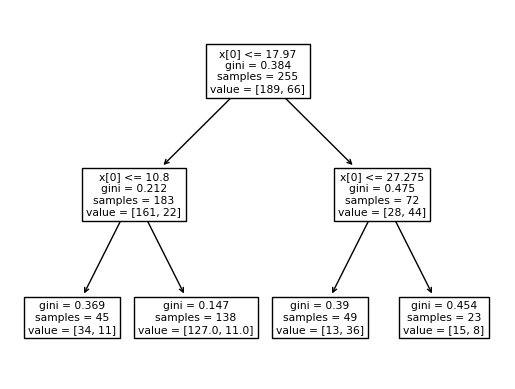

In [22]:
tree.plot_tree(clf)

In [23]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from graphviz import Source

# Assuming 'tree' is your decision tree model
dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=['List Price'],
                           class_names=['Paperback', 'Hardcover'],
                           filled=True, rounded=True,
                           special_characters=True)

# Render the tree
graph = Source(dot_data)
graph.render('decision_tree', format='png', view=True)  # Saves and opens the image
print("Tree visualization created and saved as 'decision_tree.png'.")


Tree visualization created and saved as 'decision_tree.png'.


# 5

Prediction are made by decisions nodes, each node in the decision tree represents a decision point based on the features list price, num of pages and thickness. Each decision node leads to another decision node or a leaf node. A leaf node represent the final outcomes and are labelled with paperback or hardback, suggest which book it is liekly to be majority of the time considering the prior decisions. 

In [25]:
X_2 = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]
y_2 = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']


In [72]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from graphviz import Source

# Splitting the data into training and test sets
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

training_features = ['NumPages', 'Thick', 'List Price']

# Initialize and train the DecisionTreeClassifier
clf2 = DecisionTreeClassifier(max_depth=4)
clf2.fit(X_train_2[training_features], y_train_2)

# Optionally, you can check the accuracy or visualize the tree
print("Training completed. The model is ready to make predictions or evaluate its performance.")

Training completed. The model is ready to make predictions or evaluate its performance.


[Text(0.4342105263157895, 0.9, 'x[2] <= 17.97\ngini = 0.384\nsamples = 255\nvalue = [189, 66]'),
 Text(0.21052631578947367, 0.7, 'x[0] <= 82.0\ngini = 0.212\nsamples = 183\nvalue = [161, 22]'),
 Text(0.10526315789473684, 0.5, 'x[1] <= 0.25\ngini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(0.05263157894736842, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.15789473684210525, 0.3, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.3157894736842105, 0.5, 'x[1] <= 1.65\ngini = 0.175\nsamples = 176\nvalue = [159, 17]'),
 Text(0.2631578947368421, 0.3, 'x[1] <= 0.55\ngini = 0.166\nsamples = 175\nvalue = [159, 16]'),
 Text(0.21052631578947367, 0.1, 'gini = 0.0\nsamples = 32\nvalue = [32, 0]'),
 Text(0.3157894736842105, 0.1, 'gini = 0.199\nsamples = 143\nvalue = [127, 16]'),
 Text(0.3684210526315789, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6578947368421053, 0.7, 'x[1] <= 0.95\ngini = 0.475\nsamples = 72\nvalue = [28, 44]'),
 Text(0.5263157894736842, 0.5, 'x[0] <= 2

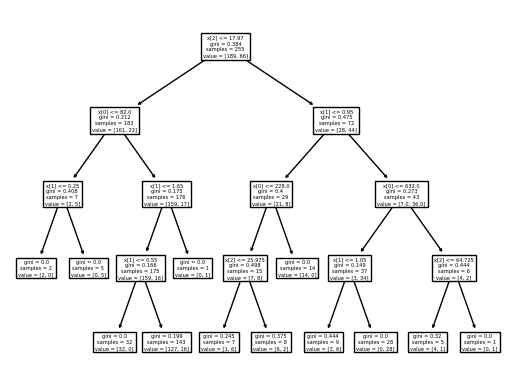

In [74]:
tree.plot_tree(clf2)

In [76]:
import graphviz
# Visualize the tree using Graphviz
dot_data = export_graphviz(clf2, out_file=None, 
                           feature_names=['NumPages', 'Thick', 'List Price'],
                           class_names=['Paperback', 'Hardcover'],
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('decision_tree_clf2', format='png', view=True)
 
print("Tree visualization created and saved as 'decision_tree.png'.")

Tree visualization created and saved as 'decision_tree.png'.


# 6

Accuracy: 0.859, Sensitivity: 0.750, Precision: 0.789, Specificity: 0.909
Accuracy: 0.844, Sensitivity: 0.700, Precision: 0.778, Specificity: 0.909


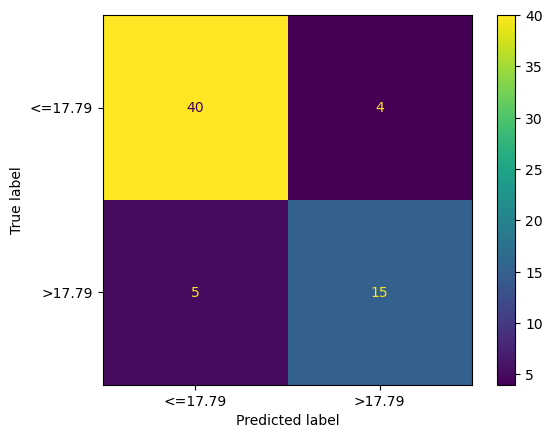

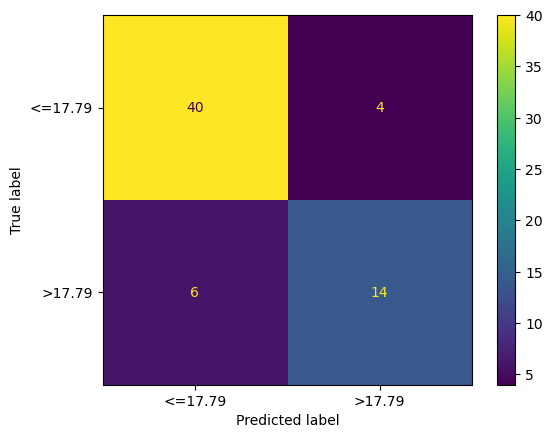

In [78]:
### import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score, precision_score

# Define the function to calculate specificity
def specificity(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

# Assuming X_2 and y_2, and X and y are already defined and preprocessed

# Split and train for the first model (max_depth=4)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=42)
clf2 = DecisionTreeClassifier(max_depth=4)
clf2.fit(X_train_2, y_train_2)
y_pred_2 = clf2.predict(X_test_2)

# Split and train for the second model (max_depth=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Metrics calculation for the first classifier
accuracy_2 = accuracy_score(y_test_2, y_pred_2)
sensitivity_2 = recall_score(y_test_2, y_pred_2)
precision_2 = precision_score(y_test_2, y_pred_2)
specificity_2 = specificity(y_test_2, y_pred_2)

# Display for the first classifier
cm_2 = confusion_matrix(y_test_2, y_pred_2)
cm_disp_2 = ConfusionMatrixDisplay(cm_2, display_labels=['<=17.79', '>17.79'])
_ = cm_disp_2.plot()
print(f"Accuracy: {accuracy_2:.3f}, Sensitivity: {sensitivity_2:.3f}, Precision: {precision_2:.3f}, Specificity: {specificity_2:.3f}")

# Metrics calculation for the second classifier
accuracy = accuracy_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
specificity_value = specificity(y_test, y_pred)

# Display for the second classifier
cm = confusion_matrix(y_test, y_pred)
cm_disp = ConfusionMatrixDisplay(cm, display_labels=['<=17.79', '>17.79'])
_ = cm_disp.plot()
print(f"Accuracy: {accuracy:.3f}, Sensitivity: {sensitivity:.3f}, Precision: {precision:.3f}, Specificity: {specificity_value:.3f}")


# 7 

Clf: predicts hard or paper back with price 
clf2: predicts hard or paper back with price, numPages and Thick. 

clf2 predicts better than clf slightly because paperback or hardback considers interactions between other variables and the type of classes. 

Below the confusion matrix are created on train data rather than test data. The test data set should be used to test how well the model is at predicting unseen data. 

The classifiers clf and clf2 are designed to predict whether a book is a paperback or hardcover based on different sets of features. clf utilizes only the List Price, which might provide a basic distinction but is generally insufficient to capture all nuances between the two categories. In contrast, clf2 incorporates List Price, NumPages, and Thick, offering a more holistic view of the data. This broader feature set allows clf2 to better identify patterns and interactions between variables that are indicative of the book's binding type.

Moreover, the models' effectiveness should ideally be evaluated using a test set rather than the training data on which they were fitted. Evaluating on the training data, as seen in the provided confusion matrices, might lead to misleading conclusions about the model’s performance. Using a test set is crucial for assessing how well the model generalizes to new, unseen examples, thus providing a more accurate measure of its predictive power in real-world scenarios.

By using more comprehensive feature sets and proper evaluation techniques, we can develop models that are not only more accurate but also more reliable when applied to new data

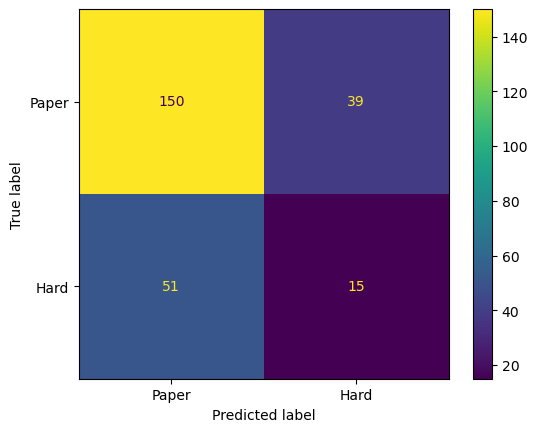

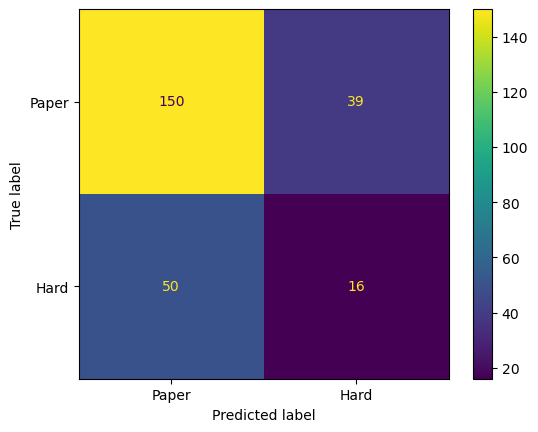

In [85]:
ConfusionMatrixDisplay(
    confusion_matrix(y_train, 
                     clf.predict(ab_reduced_noNaN_train[['List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()
ConfusionMatrixDisplay(
    confusion_matrix(y_train_2, 
                     clf2.predict(
                         ab_reduced_noNaN_train[['NumPages','Thick','List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()
